In [1]:
import piplite
await piplite.install('seaborn')

In [25]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


##### импортируем все нужные модули

In [19]:
pd.read_csv('mcs_ds_edited_iter_shuffled.csv')

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
0,30,15,200,40,0.773546,0.250555
1,15,15,100,70,0.911941,0.498329
2,30,15,100,50,0.814867,0.255546
3,15,20,100,20,1.435332,0.394603
4,30,15,100,40,1.265909,0.302943
...,...,...,...,...,...,...
102,18,23,100,20,1.287472,0.375227
103,14,17,200,60,0.899102,0.231822
104,15,20,100,50,1.171140,0.372001
105,20,20,100,40,1.234493,0.599834


##### импортируем файл csv

In [4]:
dir(boston_dataset)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [5]:
data = pd.read_csv('table.csv')
print(data)

     anchor_ratio  trans_range  node_density  iterations       ale    sd_ale
0              30           15           200          40  0.773546  0.250555
1              15           15           100          70  0.911941  0.498329
2              30           15           100          50  0.814867  0.255546
3              15           20           100          20  1.435332  0.394603
4              30           15           100          40  1.265909  0.302943
..            ...          ...           ...         ...       ...       ...
102            18           23           100          20  1.287472  0.375227
103            14           17           200          60  0.899102  0.231822
104            15           20           100          50  1.171140  0.372001
105            20           20           100          40  1.234493  0.599834
106            15           15           200          40  0.635426  0.139791

[107 rows x 6 columns]


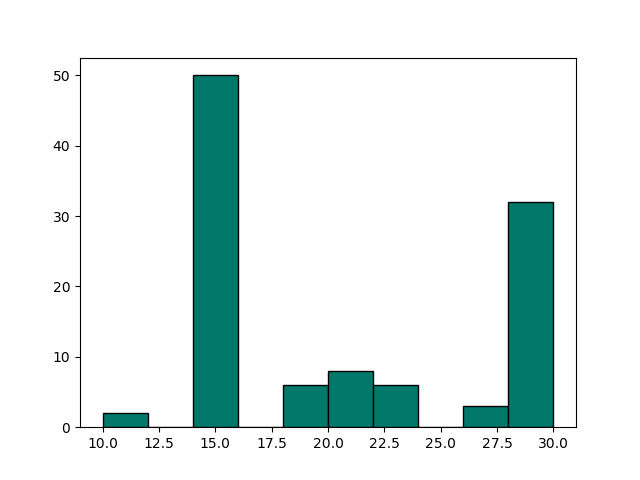

In [6]:
plt.figure()
plt.hist(data['anchor_ratio'], ec='black', color='#00796b')
plt.show()

##### гистограмма для anchor_ratio

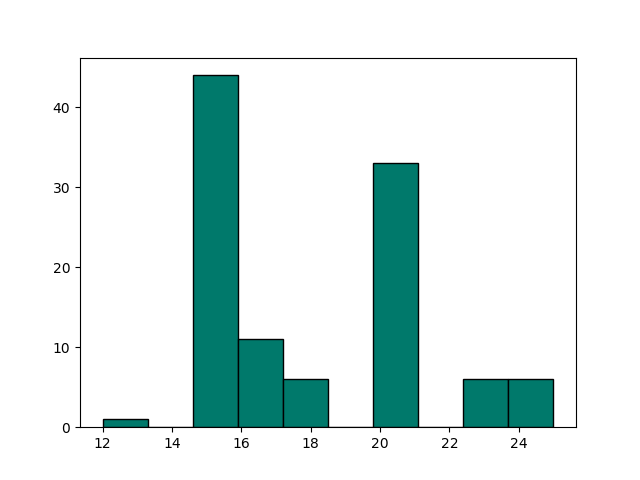

In [7]:
plt.figure()
plt.hist(data['trans_range'], ec='black', color='#00796b')
plt.show()

##### гистоuрамма для trans_range

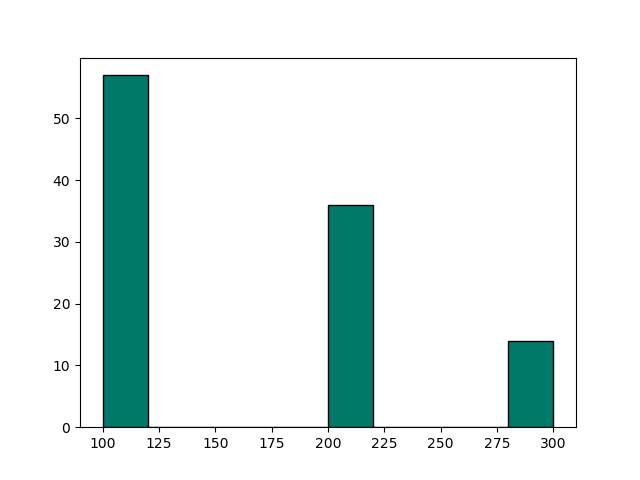

In [8]:
plt.figure()
plt.hist(data['node_density'], ec='black', color='#00796b')
plt.show()

##### гистограмма для node_density

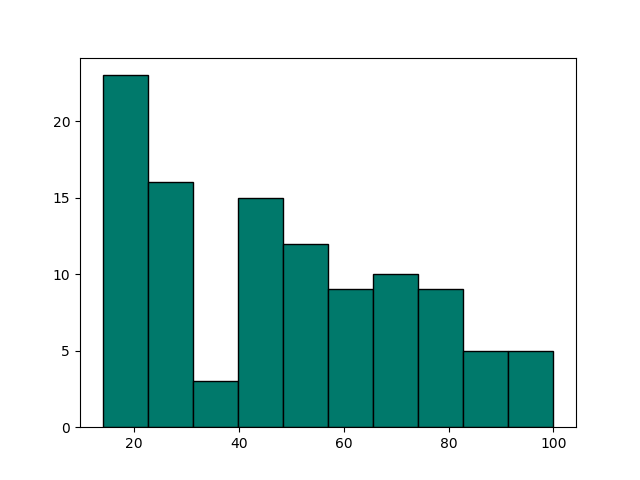

In [9]:
plt.figure()
plt.hist(data['iterations'], ec='black', color='#00796b')
plt.show()

##### гистограмма для iterations

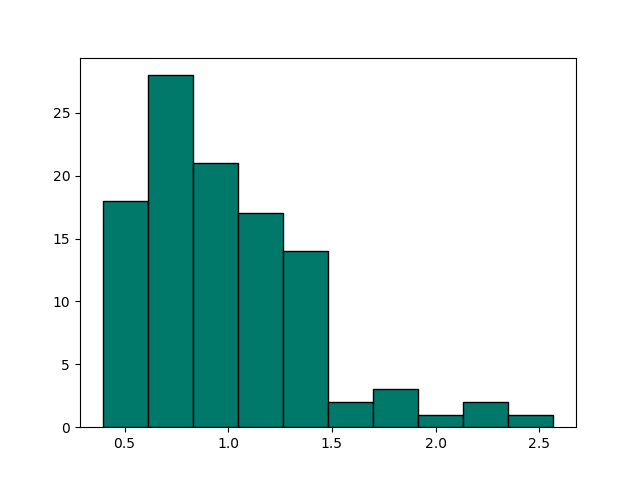

In [10]:
plt.figure()
plt.hist(data['ale'], ec='black', color='#00796b')
plt.show()

##### гистограмма для ale

In [11]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

##### корреляция

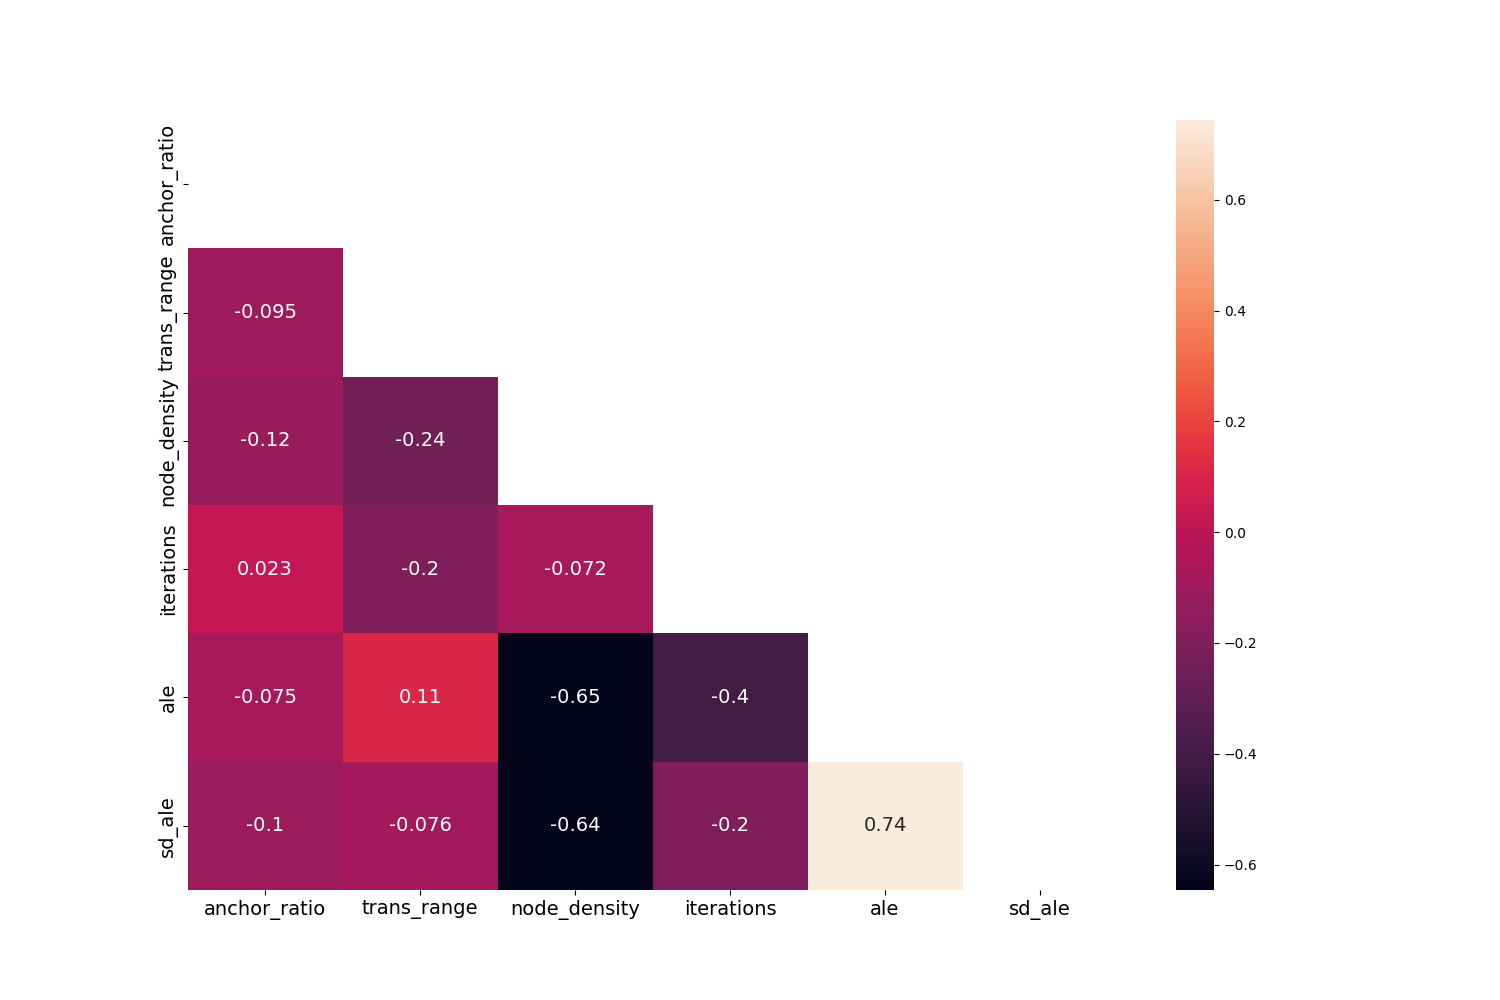

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size': 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

##### тепловая карта

In [13]:
x = np.array(data['anchor_ratio']).reshape((-1, 1))
y = np.array(data['ale'])

model1 = LinearRegression().fit(x, y)

print(f'Коэффициент детерминации: {model1.score(x, y)}')
print(f'Интерцепт: {model1.intercept_}')
print(f'Коэффицент: {model1.coef_[0]}')

Коэффициент детерминации: 0.0056246135668754915
Интерцепт: 1.0767225632713422
Коэффицент: -0.004543690738630977


##### линейная регрессия для anchor_ratio

In [14]:
x = np.array(data['trans_range']).reshape((-1, 1))
y = np.array(data['ale'])

model2 = LinearRegression().fit(x, y)

print(f'Коэффициент детерминации: {model2.score(x, y)}')
print(f'Интерцепт: {model2.intercept_}')
print(f'Коэффицент: {model2.coef_[0]}')

Коэффициент детерминации: 0.011948396959491459
Интерцепт: 0.7266644855844975
Коэффицент: 0.01436396730290578


##### линейная регрессия для trans_range

In [15]:
x = np.array(data['node_density']).reshape((-1, 1))
y = np.array(data['ale'])

model3 = LinearRegression().fit(x, y)

print(f'Коэффициент детерминации: {model3.score(x, y)}')
print(f'Интерцепт: {model3.intercept_}')
print(f'Коэффицент: {model3.coef_[0]}')

Коэффициент детерминации: 0.4172217579204366
Интерцепт: 1.57554471677975
Коэффицент: -0.0037047903676861557


##### линейная регрессия для node_density

In [16]:
x = np.array(data['iterations']).reshape((-1, 1))
y = np.array(data['ale'])

model4 = LinearRegression().fit(x, y)

print(f'Коэффициент детерминации: {model4.score(x, y)}')
print(f'Интерцепт: {model4.intercept_}')
print(f'Коэффицент: {model4.coef_[0]}')

Коэффициент детерминации: 0.16031556573386607
Интерцепт: 1.3008346874270955
Коэффицент: -0.00662723304970711


##### линейная регрессия для iterations

In [24]:
x=data['ale']
y=data.drop('ale',axis=1)
X_train, X_test, y_train, y_test=train_test_split(y,x,test_size=0.2,random_state=10)
model=LinearRegression().fit(X_train,y_train)
print(model.coef_)
print(model.intercept_)

[-0.00848473 -0.00488305 -0.00262883 -0.00609827  0.72302974]
1.7586727152391572


##### модель линейной регрессии и итоговый массив

In [36]:
data['ale'].skew()

1.3264463863800067

##### повышаем уровень точности

In [41]:
data['ale'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0      0.773546
1      0.911941
2      0.814867
3      1.435332
4      1.265909
         ...   
102    1.287472
103    0.899102
104    1.171140
105    1.234493
106    0.635426
Name: ale, Length: 107, dtype: float64>

In [42]:
y_log = np.log(data['ale'])
y_log.tail()

102    0.252681
103   -0.106359
104    0.157978
105    0.210660
106   -0.453460
Name: ale, dtype: float64